# Introduction
In a series of weekly articles, I will be covering some important topics of statistics with a twist.

The goal is to use Python to help us get intuition on complex concepts, empirically test theoretical proofs, or build algorithms from scratch. In this series, you will find articles covering topics such as random variables, sampling distributions, confidence intervals, significance tests, and more.

At the end of each article, you can find exercises to test your knowledge. The solutions will be shared in the article of the following week.

Articles published so far:
- [Bernoulli and Binomial Random Variables with Python](https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36)
- [From Binomial to Geometric and Poisson Random Variables with Python](https://towardsdatascience.com/geometric-and-poisson-random-variables-with-python-e5dcb63d6b55)
- [Sampling Distribution of a Sample Proportion with Python](https://towardsdatascience.com/sampling-distributions-with-python-f5a5f268f636)

As usual the code is available on my [GitHub](https://github.com/luisroque/College_Statistics_with_Python).

# Confidence Intervals and Margin of Error

A group of students was trying to understand which character of *friends* was the funniest and they narrowed it down to Chandler Bing or Ross Geller. They were interested in the likelihood of Ross actually winning, since he has a very awkward sense of humor compared to the sarcastic and witty sense of humor of Chandler. They decided to setup a poll in their school. Ideally, they would ask the entire population, but shortly they understood that it would not be feasible to ask the 5,000 students their preference. Instead they decided to take random samples of 40 students and calculate the sample proportion that supported Ross. The first value that they arrived at was $\hat p=0.61$.

Notice that to continue with their study, the group of students needs to make sure that the conditions to calculate a valid confidence interval for a proportion are met. There are 3 conditions:
* The sample has to be random
* The sampling distribution of the sample proportions can be approximated by a normal distribution. The rule of thumb is that you need to have at least 10 successes and 10 failures
* The samples are required to be independent. The rule of thumb is that if you are sampling without replacement your sample size should be less than 10% the population size

In [1]:
import numpy as np
import seaborn as sns
import math
from scipy.stats import bernoulli, norm, t, skewnorm
import matplotlib.pyplot as plt

In [2]:
p_hat = 0.61
n = 40

In [3]:
print('Normal conditions:')
print('successes >= 10: ' + str(n*p_hat >= 10))
print('failures >= 10 : ' + str(n*(1-p_hat) >= 10))
print('--')
print('Independence condition:')
print(40/5000 < 0.1)

Normal conditions:
successes >= 10: True
failures >= 10 : True
--
Independence condition:
True


All the conditions are met, the group of students could now focus on building the sampling distribution of the sample proportions; from this distribution they calculated the possible sample proportions they could get and their likelihoods. 

We already saw that the mean of the sampling distribution is the actual population proportion $p$ and the standard deviation of the sample proportions $\sigma_{\hat p}=\sqrt{\frac{p(1-p)}{n}}$.

Let's start to connect these concepts with the concept of confidence intervals. What is the probability that $\hat p = 0.61$ is within $2\sigma_{\hat p}$ of $p$? For a normal distribution this is approximately 95%. This is equivalent to say that there is a 95% probability that $p$ is within $2\sigma_{\hat p}$ of $\hat p$. And this is the fundamental idea for a confidence interval.

Now, we have a problem. We do not know $p$, so we need to use an estimate. The best estimate that we have is naturally $\hat p$. Thus, instead of using $\sigma_{\hat p}$ we use the Standard Error $\text{SE}_{\hat p} =\sqrt{\frac{\hat p(1- \hat p)}{n}}$ to compute our confidence intervals.

In [4]:
SE_hat_p = np.sqrt(p_hat*(1-p_hat)/n)
print(f'With 95% confidence between {np.round(p_hat - 2*SE_hat_p, 2)} and {np.round(p_hat + 2*SE_hat_p, 2)} of students prefer the awkward humor of Ross.')

With 95% confidence between 0.46 and 0.76 of students prefer the awkward humor of Ross.


Notice that our confidence interval calculated above can change based on what sample proportion we actually choose. If the group of students sample again 40 new students it could happen that the new sample proportion is now 0.55.

In [5]:
p_hat = 0.55
n = 40
SE_hat_p = np.sqrt(p_hat*(1-p_hat)/n)
print(f'With 95% confidence between {np.round(p_hat - 2*SE_hat_p, 2)} and {np.round(p_hat + 2*SE_hat_p, 2)} of students prefer the awkward humor of Ross.')

With 95% confidence between 0.39 and 0.71 of students prefer the awkward humor of Ross.


We can connect this concept with margin of error. The margin of error for our first trial (knowing that we are interested in getting 95% confidence) is 2 times our $\text{SE}_{\hat p}$.

An interesting question that often arises is "what can you do to reduce the margin of error"? Notice that the margin of error is dependent on $\text{SE}_{\hat p}$, which is inversely proportional to the sample size. So, one possible way to reduce the margin of error is to increase the sample size.

In [6]:
print(f'Margin of error = {2*SE_hat_p}')

Margin of error = 0.15732132722552272


Again, the same reasoning applies. Depending on what our sample proportion is, our margin of error could have a different value.

##### The idea is that if we use this method of computing confidence intervals over and over again, it is going to produce different intervals each time (depending on the sample proportion) that include the true proportion 95% of the time.

In [7]:
confidence_interval=0.95
p = 0.61
n = 50
number_trials = 25

p_hat_list = []
SE_hat_p_list = []

for i in range(number_trials):
    s_ = bernoulli.rvs(p=p, size=n)
    p_hat = s_[s_==1].shape[0] / s_.shape[0]
    p_hat_list.append(p_hat)
    SE_hat_p_list.append(2*np.sqrt(p_hat*(1-p_hat)/n))

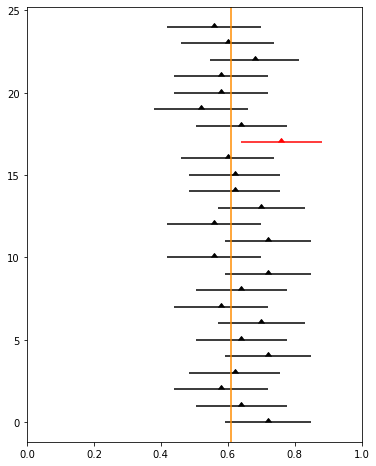

24/25=0.96


In [8]:
j=0
_, ax = plt.subplots(1, 1, figsize=(6, 8))
for i in range(len(p_hat_list)):
    if (p>p_hat_list[i]-SE_hat_p_list[i]) & (p<p_hat_list[i]+SE_hat_p_list[i]):
        # interval contains p
        ax.errorbar(p_hat_list[i], np.arange(len(p_hat_list))[i],lolims=True, xerr=SE_hat_p_list[i], yerr=0.0, linestyle='', c='black')
        j +=1
    else:
        # interval does not contain p
        ax.errorbar(p_hat_list[i], np.arange(len(p_hat_list))[i],lolims=True, xerr=SE_hat_p_list[i], yerr=0.0, linestyle='', c='red')
ax.axvline(0.61, color='darkorange')
plt.xlim(0,1)
plt.show()
print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')

We are plotting the sample proportion $\hat p$ and the interval $ \hat p \pm 2 \cdot SE_{\hat p}$. Notice that about 92% of our samples intervals contain the true proportion $p$. This number will converge to 95% as the number of samples increase.

In [9]:
number_trials = 2000

j=0
for i in range(number_trials):
    p_hat = bernoulli.rvs(p=p, size=n)
    p_hat = p_hat[p_hat==1].shape[0] / p_hat.shape[0]
    SE_hat_p = 2*np.sqrt(p_hat*(1-p_hat)/n)
    if (p>p_hat-SE_hat_p) & (p<p_hat+SE_hat_p):
        # interval contains p
        j +=1

print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')

1877/2000=0.94


What if we were interested in the 99% Confidence Interval? We need to calculate the critical value, also known as $z^*$, for that specific confidence level. The critical value is nothing else than the number of standard deviations below and above the mean that we need to get to capture the desired confidence level (99%). Notice that using a z-table or when using the `norm.ppf` from `scipy`, remember that the values that you get are for a single tail confidence interval. This is not what we want, so we need to get the value for 99.5% instead (leaving 0.5% on each tail of the distribution gives the 99% of confidence).

In [10]:
CI = 0.99
critical_value = norm.ppf(CI+(1-CI)/2) # we want the critical value for a two-tail distribution
critical_value

2.5758293035489004

There is a 99% chance that $p$ is within $2.58 \cdot \sigma_{\hat p}$ of $\hat p$.

In [11]:
number_trials = 1000

j=0
for i in range(number_trials):
    p_hat = bernoulli.rvs(p=p, size=n)
    p_hat = p_hat[p_hat==1].shape[0] / p_hat.shape[0]
    SE_hat_p = critical_value*np.sqrt(p_hat*(1-p_hat)/n)
    if (p>p_hat-SE_hat_p) & (p<p_hat+SE_hat_p):
        # interval contains p
        j +=1

print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')

994/1000=0.99


# Conditions for Valid Confidence Intervals for a Proportion

Let's start by recalling the conditions for valid intervals for a proportion:

* The sample has to be random
* The sampling distribution of the sample proportions can be approximated by a normal distribution. The rule of thumb is that you need to have at least 10 successes and 10 failures
* The samples are required to be independent. The rule of thumb is that if you are sampling without replacement your sample size should be less than 10% the population size

To help us understand the implications, we are going to exemplify what happens when one of the conditions is not met. First, let's create a function to compute the confidence intervals and plot the last 50 samples.

In [12]:
def confidence_interval(p, n, number_trials, N, ci=0.95, sample='random'):
    p_ = bernoulli.rvs(p=p, size=N)
    p_hat_list = []
    SE_hat_p_list = []
    
    if sample!='random':
        # Inducing bias on the sampling
        p_.sort()
        p_ = p_[:-int(0.2*N)]
        np.random.shuffle(p_)
    
    for i in range(number_trials):
        s_ = np.random.choice(p_, n, replace=False)
        p_hat = s_[s_==1].shape[0] / s_.shape[0]
        p_hat_list.append(p_hat)
        SE_hat_p_list.append(2*np.sqrt(p_hat*(1-p_hat)/n))

    j=0
    _, ax = plt.subplots(1, 1, figsize=(6, 8))
    for i in range(len(p_hat_list)):
        if (p>p_hat_list[i]-SE_hat_p_list[i]) & (p<p_hat_list[i]+SE_hat_p_list[i]):
            # interval contains p
            if i > len(p_hat_list)-50:
                ax.errorbar(p_hat_list[i], np.arange(len(p_hat_list))[i],lolims=True, xerr=SE_hat_p_list[i], yerr=0.0, linestyle='', c='black')
            j +=1
        else:
            # interval does not contain p
            if i > len(p_hat_list)-50:    
                ax.errorbar(p_hat_list[i], np.arange(len(p_hat_list))[i],lolims=True, xerr=SE_hat_p_list[i], yerr=0.0, linestyle='', c='red')
    ax.axvline(0.61, color='darkorange')
    plt.xlim(0,1)
    plt.show()
    print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')

The first example is the case where our sample is not random, i.e. there is some bias that we are introducing by the way that we are sampling from the population. Referring to our context, this could mean that our group of students is surveying people outside of the school's Comedy Club, with whom the Chandler jokes land more effectively. Our confidence suddenly drops to less than 90%.

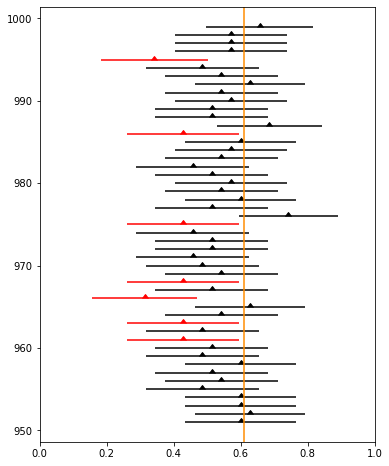

884/1000=0.88


In [13]:
confidence_interval(p=0.61, n=35, number_trials=1000, N=500, sample='not_random')

The second case is the fact that we can not assume that our sampling distribution is normal. Notice that our sampling size is 10, which does not guarantee the more than 10 successes and failures. Once again, despite the fact that we are calculating the 95% confidence interval, the percentage of times where the true proportion $p$ is inside the calculated interval is around 90%.

In [14]:
n = 10
print('Normal conditions:')
print('successes >= 10: ' + str(n*p_hat >= 10))
print('failures >= 10 : ' + str(n*(1-p_hat) >= 10))

Normal conditions:
successes >= 10: False
failures >= 10 : False


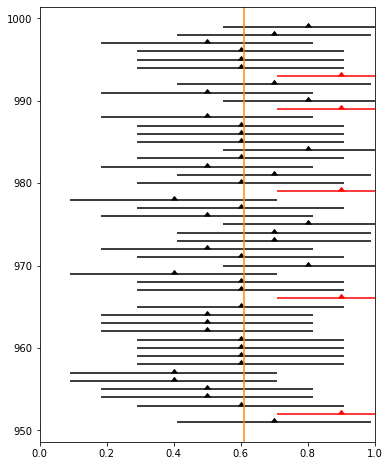

897/1000=0.9


In [15]:
confidence_interval(p=0.61, n=10, number_trials=1000, N=500)

Finally, the last condition is the independence between samples. If the rule of thumb of the 10% is not met we can not assume independence. Once again, our confidence drops to close to 90%.

In [45]:
n = 150
N=600
print('Independence condition:')
print(n/N < 0.1)

Independence condition:
False


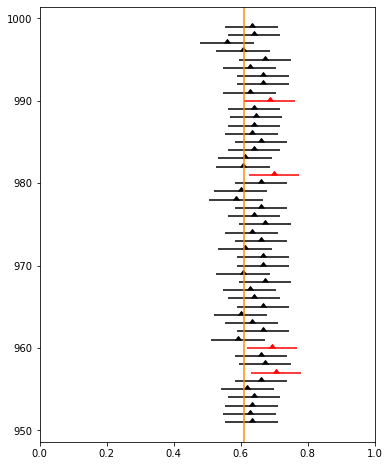

904/1000=0.9


In [46]:
confidence_interval(p=0.61, n=n, number_trials=1000, N=N)

Now, that we saw all cases where the conditions are not met, let's create one that passes all 3 tests.

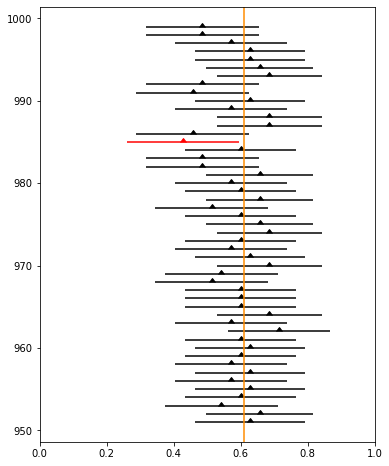

947/1000=0.95


In [18]:
confidence_interval(p=0.61, n=35, number_trials=1000, N=500)

 Our confidence converges effectively to 95%. We can feel confident about our confidence.

# Estimating the Population Mean

We have been solving the problem of estimating the population proportion, which percentage of the population prefers Ross's humor over Chandler's. A different problem is the estimation of the mean of a population. Let's see the main differences. When we estimated the confidence interval for the population proportion we defined:

$$\hat p \pm z^* \cdot \sqrt{\frac{\hat p (1-\hat p)}{n}}$$

Following the same principle, we would define the population mean as,

$$\bar x \pm z^* \cdot \frac{s}{\sqrt{n}}$$

Notice that we do not know our population standard deviation, so we use our best estimate, the sample standard deviation. Unfortunately, if we were to use this approach to calculate our confidence interval, we would be underestimating the actual interval. To achieve the 95% confidence we need to use a different critical value based on a t-distribution.


$$\bar x \pm t^* \cdot \frac{s}{\sqrt{n}}$$

Let's do a couple of experiments to prove our point. First, we define the confidence interval for the mean based on the sample standard deviation but calculating the critical value from a normal distribution.

In [19]:
def confidence_interval_mean(μ, σ, n, number_trials, N, ci=0.95, sample='random'):
    x_ = norm.rvs(loc=μ, scale=σ, size=N)
    x_hat_list = []
    SE_hat_x_list = []
    
    if sample!='random':
        # Inducing bias on the sampling
        x_.sort()
        x_ = x_[:-int(0.2*N)]
        np.random.shuffle(x_)
    
    for i in range(number_trials):
        s_ = np.random.choice(x_, n, replace=False)
        x_hat = np.mean(s_)
        x_hat_list.append(x_hat)
        SE_hat_x_list.append(norm.ppf(ci+(1-ci)/2)*np.std(s_)/np.sqrt(n))

    j=0
    _, ax = plt.subplots(1, 1, figsize=(6, 8))
    for i in range(len(x_hat_list)):
        if (μ>x_hat_list[i]-SE_hat_x_list[i]) & (μ<x_hat_list[i]+SE_hat_x_list[i]):
            # interval contains p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='black')
            j +=1
        else:
            # interval does not contain p
            if i > len(x_hat_list)-50:    
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='red')
    ax.axvline(μ, color='darkorange')
    #plt.xlim(0,1)
    plt.show()
    print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')

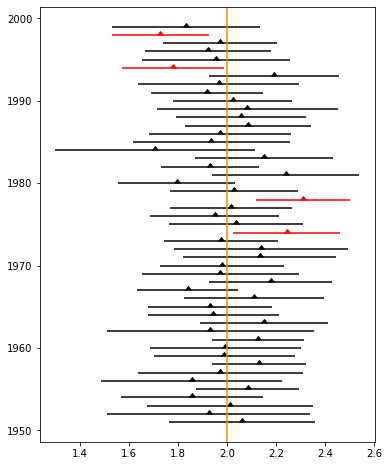

1837/2000=0.92


In [20]:
confidence_interval_mean(2, 0.5, 12, 2000, 1000)

What we were expecting happened, as the true mean is only contained in our confidence intervals 92% of the time. This is not the intended, as we are calculating the 95% confidence intervals for the mean. 

In the second experiment, the critical value used is now calculated from a t-distribution.

In [21]:
def confidence_interval_mean_t(μ, σ, n, number_trials, N, ci=0.95, sample='random'):
    x_ = norm.rvs(loc=μ, scale=σ, size=N)
    x_hat_list = []
    SE_hat_x_list = []
    
    if sample!='random':
        # Inducing bias on the sampling
        x_.sort()
        x_ = x_[:-int(0.2*N)]
        np.random.shuffle(x_)
    
    for i in range(number_trials):
        s_ = np.random.choice(x_, n, replace=False)
        x_hat = np.mean(s_)
        x_hat_list.append(x_hat)
        SE_hat_x_list.append(t.ppf(ci+(1-ci)/2, df=n-1)*np.std(s_)/np.sqrt(n))

    j=0
    _, ax = plt.subplots(1, 1, figsize=(6, 8))
    for i in range(len(x_hat_list)):
        if (μ>x_hat_list[i]-SE_hat_x_list[i]) & (μ<x_hat_list[i]+SE_hat_x_list[i]):
            # interval contains p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='black')
            j +=1
        else:
            # interval does not contain p
            if i > len(x_hat_list)-50:    
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='red')
    ax.axvline(μ, color='darkorange')
    #plt.xlim(0,1)
    plt.show()
    print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')

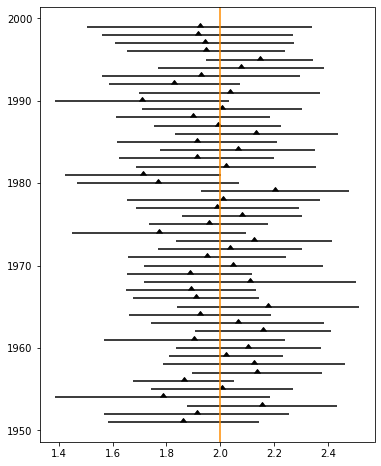

1892/2000=0.95


In [49]:
confidence_interval_mean_t(2, 0.5, 12, 2000, 1000)

Our confidence converges effectively to 95%. Once again, we can feel confident about our confidence.

# Conditions for valid t intervals

We already saw the conditions for valid intervals for a proportion. In the case of t intervals, the same rules apply. The difference is on how to validate if our distribution can be considered normal. :

* The sample has to be random
* The sampling distribution of the sample mean can be approximated by a normal distribution. There are three ways to achieve it: sample size is bigger than 30 (central limit theorem applies), original distribution is normal or the original distribution is symmetric.
* The samples are required to be independent. The rule of thumb is that if you are sampling without replacement your sample size should be less than 10% the population size

We leave the experiments to prove that the bullets presented as an exercise for this week.

# Exercises

You will get the solutions on next week's article.

1. Change the function `confidence_interval_mean_t` and build 5 different experiments to calculate a 95% interval for a sample mean, 3 of them where the conditions for a t interval are not met and 2 where they are. For the 3 where the conditions are not met define the following scenarios: sampling not random, original distribution not approximately normal and independence not met. For the 2 cases where conditions are met define: one case where the original distribution is normal and another where the original distribution is skewed but the sampling mean is normally distributed. For these last two cases, the true population mean should be contained in the calculated confidence intervals 95% of the time. 

*Hint: you might find useful to use the function `skewnorm` from `scipy`. Below, you have a modified version of a normal distribution skewed by a skewness parameter, mean and standard deviation.*

In [23]:
# code adapted from https://stackoverflow.com/questions/49367436/scipy-skewnorm-mean-not-matching-theory

skew = 4.0
mean = 2
stdev = 0.5

delta = skew / math.sqrt(1. + math.pow(skew, 2.))
adjStdev = math.sqrt(math.pow(stdev, 2.) / (1. - 2. * math.pow(delta, 2.) / math.pi))
adjMean = mean - adjStdev * math.sqrt(2. / math.pi) * delta

print('target mean={:.4f} actual mean={:.4f}'.format(mean, float(skewnorm.stats(skew, loc=adjMean, scale=adjStdev, moments='mvsk')[0])))
print('target stdev={:.4f} actual stdev={:.4f}'.format(stdev, math.sqrt(float(skewnorm.stats(skew, loc=adjMean, scale=adjStdev, moments='mvsk')[1]))))

target mean=2.0000 actual mean=2.0000
target stdev=0.5000 actual stdev=0.5000


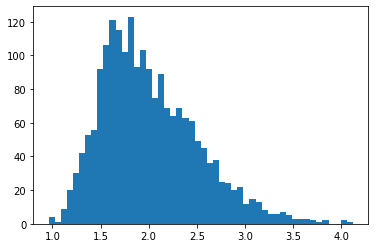

In [24]:
# Original skewed distribution

plt.hist(skewnorm.rvs(a = skew, loc=adjMean, scale=adjStdev, size=2000), bins=50);

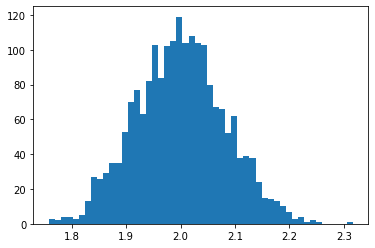

In [25]:
# Approximately normal distribution of the sample mean because sample 
# size is bigger than 30 (CTL applies)

plt.hist(np.mean([skewnorm.rvs(a = skew, loc=adjMean, scale=adjStdev, size=35) for _ in range(2000)], axis=1), bins=50);

### Answers from last week

1. Rick takes an SRS of 75 citizens in a distant planet to see what proportion of citizens sampled are satisfied with their standard of living. Suppose that 60% of the 1,000,000,000 citizens that live in the planet are satisfied with their standard of living.
What are the mean and standard deviation of the sampling distribution of the proportion of citizens who are satisfied with their standard of living?

In [26]:
mu_hat_p = 0.6
print(mu_hat_p)

sigma_p_hat = np.sqrt(0.6*(1-0.6)/75)
print(sigma_p_hat)

0.6
0.0565685424949238


2. A certain planet with over 1,000,000 households has a mean household income of \\$1,000,000 with a standard deviation of \\$150,000. Rick plans to take random samples of 700 households and calculate the sample mean income. Calculate the mean and standard deviation of the sampling distribution of $\bar x$.

In [27]:
μ = 1000000
σ = 150000
n = 700

print(f'μ_x_bar = {μ}')
print(f'σ_x_bar = {σ/n**(1/2)}')

μ_x_bar = 1000000
σ_x_bar = 5669.467095138409


3. Rick is performing quality control tests on different portal guns since there is some variability in the manufactoring process. A certain gun has a target thickness of 5mm. The distribution of thicknesses is skewed to the right with a mean of 5mm and a standard deviation of 1mm. A quality control check on this part involves taking a random sample of 35 points and calculating the mean thickness of those points. What is the shape of the sampling distribution of the sample mean thickness? What is the probability that the mean thickness in the sample is within 0.2mm of the target value?

In [28]:
# Since n = 35 >= 30, the central limit theorem applies.
# Even though the population is skewed to the right, the sample means
# are normally distributed due to the sample size.

In [29]:
μ = 5
σ = 1
n = 100

In [30]:
norm.cdf(5.2, μ, σ/n**(1/2)) - norm.cdf(4.8, μ, σ/n**(1/2))

0.9544997361036418